Taller 1 de Ciencia de Datos Aplicada 
Presentado por: Angie Rincón
Maestría: Ingeniería de Información 

Análisis exploratorio de los datos de Airbnb para la ciudad de Praga, República Checa, con el fin de identificar posibles condiciones faborables para la inversión inmobiliara

Cargue de información

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
# Pandas configuration for extending the number of columns and rows to show
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

In [3]:
# Loading the CSV file as dataframe
listings_df = pd.read_csv("./DataSet/listings.csv.gz")


Exploración inicial del dataset

In [4]:
# Showing dataframe dimensions
listings_df.shape

(8427, 75)

In [5]:
# Showing column types
listings_df.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                            

In [6]:
# Showing the number of unique values of listing ids
# This can be helpful to diagnose duplicity
listings_df["id"].nunique()

8427

In [7]:
listings_df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1377061,https://www.airbnb.com/rooms/1377061,20230624004849,2023-06-24,city scrape,Rental unit in Prague · ★4.51 · 1 bedroom · 1 ...,In leafy yet central location Prague - Radotin...,NaN,https://a0.muscache.com/pictures/20709870/1e87...,7287777,https://www.airbnb.com/users/show/7287777,Simon,2013-07-04,"Prague, Czechia",Me and my son Simon are ready to show you the ...,within a day,100%,89%,NaN,https://a0.muscache.com/im/pictures/user/f9e0b...,https://a0.muscache.com/im/pictures/user/f9e0b...,Prague 16,2,6,"['email', 'phone', 'work_email']",t,t,NaN,Praha 16,NaN,49.98424,14.36388,Private room in rental unit,Private room,2,NaN,1 shared bath,NaN,1.0,"[""Outdoor furniture"", ""Resort access"", ""Wifi"",...",$862.00,2,7,2,2,7,7,2.0,7.0,NaN,t,30,60,90,365,2023-06-24,62,12,2,2015-01-05,2023-06-03,4.51,4.60,4.12,4.64,4.95,4.54,4.53,NaN,f,2,1,1,0,0.60
1,1379714,https://www.airbnb.com/rooms/1379714,20230624004849,2023-06-24,city scrape,Rental unit in Prague · ★4.72 · 2 bedrooms · 1...,A special type of accommodation that will allo...,NaN,https://a0.muscache.com/pictures/40132881/64cb...,7469380,https://www.airbnb.com/users/show/7469380,Jarda,2013-07-14,"Prague, Czechia","My name is Jarda, I work in Prague :-) and I l...",within an hour,100%,97%,t,https://a0.muscache.com/im/users/7469380/profi...,https://a0.muscache.com/im/users/7469380/profi...,Nové Město,2,3,"['email', 'phone']",t,t,NaN,Praha 2,NaN,50.07565,14.41665,Entire rental unit,Entire home/apt,16,NaN,2 baths,2.0,16.0,"[""Wifi"", ""Dishes and silverware"", ""Smoke alarm...","$3,600.00",2,1125,2,2,1125,1125,2.0,1125.0,NaN,t,6,15,42,132,2023-06-24,111,17,2,2014-09-07,2023-06-11,4.72,4.83,4.25,4.87,4.89,4.80,4.73,NaN,t,1,1,0,0,1.04
2,667478,https://www.airbnb.com/rooms/667478,20230624004849,2023-06-24,city scrape,Rental unit in Prague · ★4.57 · Studio · 1 bed...,"Royal Court Hotel is a brand new, modern and c...",Our family hotel offers you 45 cozy and comfor...,https://a0.muscache.com/pictures/miso/Hosting-...,3279605,https://www.airbnb.com/users/show/3279605,Elena And Kira,2012-08-16,"Prague, Czechia",We work for The Royal Court Apartments as Rese...,within a few hours,100%,72%,t,https://a0.muscache.com/im/users/3279605/profi...,https://a0.muscache.com/im/users/3279605/profi...,Prague 2,17,17,"['email', 'phone', 'work_email']",t,t,"Prague, Hlavní město Praha, Czechia",Praha 2,NaN,50.07040,14.42886,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,1.0,"[""Pack \u2019n play/Travel crib"", ""Wifi"", ""Sho...","$7,012.00",1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,2,8,24,277,2023-06-24,173,0,0,2012-09-17,2020-11-22,4.57,4.59,4.80,4.83,4.78,4.35,4.74,NaN,f,16,15,1,0,1.32
3,668858,https:/

Análisis preliminar de posibles variables de análisis

In [8]:
listings_df["neighbourhood_cleansed"].unique()

array(['Praha 16', 'Praha 2', 'Praha 1', 'Praha 10', 'Praha 7', 'Praha 8',
       'Praha 5', 'Praha 3', 'Praha 9', 'Praha 6', 'Praha 4', 'Praha 14',
       'Praha 17', 'Praha 13', 'Praha 15', 'Velká Chuchle', 'Suchdol',
       'Praha 18', 'Dubeč', 'Dolní Chabry', 'Zbraslav', 'Praha 22',
       'Petrovice', 'Kunratice', 'Zličín', 'Praha 11', 'Praha 21',
       'Klánovice', 'Praha 12', 'Šeberov', 'Újezd', 'Štěrboholy',
       'Řeporyje', 'Lysolaje', 'Ďáblice', 'Kolovraty', 'Slivenec',
       'Dolní Počernice', 'Libuš', 'Praha 20', 'Troja', 'Praha 19',
       'Březiněves', 'Koloděje', 'Nebušice', 'Satalice', 'Čakovice',
       'Lipence', 'Dolní Měcholupy', 'Vinoř', 'Nedvězí'], dtype=object)

In [9]:
listings_df["neighbourhood_group_cleansed"].unique()

array([nan])

In [10]:
listings_df["property_type"].unique()

array(['Private room in rental unit', 'Entire rental unit',
       'Entire serviced apartment', 'Entire condo', 'Tiny home',
       'Entire guest suite', 'Private room in serviced apartment',
       'Private room in home', 'Entire loft',
       'Private room in bed and breakfast', 'Entire guesthouse',
       'Private room in condo', 'Room in aparthotel',
       'Shared room in bed and breakfast', 'Room in serviced apartment',
       'Entire home', 'Private room in loft', 'Private room in townhouse',
       'Room in hotel', 'Room in boutique hotel', 'Entire villa',
       'Entire townhouse', 'Boat', 'Shared room in rental unit',
       'Shared room in hostel', 'Houseboat', 'Entire bed and breakfast',
       'Private room in guest suite', 'Room in bed and breakfast',
       'Private room in hostel', 'Room in hostel', 'Entire place',
       'Private room in villa', 'Private room in guesthouse',
       'Private room', 'Entire bungalow', 'Shared room in condo',
       'Private room in castl

In [11]:
listings_df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [12]:
listings_df["accommodates"].unique()

array([ 2, 16,  3,  4,  5,  6,  7,  8,  9, 12,  1, 14, 10, 15, 11, 13,  0],
      dtype=int64)

In [13]:
listings_df["review_scores_rating"].unique()

array([4.51, 4.72, 4.57, 4.54, 4.41, 4.79, 5.  , 4.88, 4.92, 4.71, 4.82,
       4.96, 4.94, 4.25, 4.83, 4.66, 4.58, 4.76, 4.9 , 4.42, 4.91, 4.52,
       4.43, 4.8 , 4.81, 4.75, 4.55, 4.68, 4.93, 4.74, 4.6 , 4.65, 4.62,
       4.59, 4.77, 4.84, 4.86, 4.31, 4.35, 4.87, 4.46, 4.69, 4.48, 4.37,
       4.5 , 4.22, 4.89, 0.  , 4.29, 4.64, 4.63, 4.19, 4.95, 4.34, 4.05,
       4.61, 4.67, 4.47, 4.1 , 4.73, 4.78, 4.97, 4.27, 4.56, 4.53, 4.08,
       4.04, 4.4 , 4.49, 3.9 , 4.44, 4.2 , 4.45,  nan, 4.85, 4.39, 4.7 ,
       4.16, 4.99, 4.38, 4.  , 4.18, 3.33, 4.09, 4.14, 4.33, 4.21, 4.17,
       3.71, 4.13, 4.98, 3.96, 4.32, 4.28, 3.  , 3.88, 4.15, 3.67, 3.97,
       3.75, 4.07, 4.23, 4.36, 2.  , 4.26, 3.83, 3.5 , 1.  , 2.43, 4.3 ,
       4.24, 3.2 , 3.93, 2.8 , 3.63, 3.86, 4.12, 3.92, 3.25, 2.5 , 3.38,
       3.89, 3.6 , 3.95, 4.06, 3.69, 3.98, 3.57, 2.67, 3.94, 4.01, 4.03,
       3.8 , 3.64, 2.4 , 2.75, 3.82, 3.77, 2.83, 3.4 , 3.7 , 4.11, 3.36,
       3.78, 3.43])

Entendimiento inicial de los datos (Punto 2)

Variables en análisis
Se seleccionan las siguientes variables por su posible influencia en la cantidad de huespedes que tenga cada propiedad
1. price
2. neighbourhood_cleansed
3. review_scores_rating
4. room_type
5. review_scores_location 


Análisis de la variable de precio

In [14]:
listings_df["price"].describe()

count          8427
unique         2991
top       $1,200.00
freq            124
Name: price, dtype: object

In [15]:
# We need to transform the price attribute from object to float
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [16]:
listings_df["price_float"].describe()

count      8427.000000
mean       3350.362644
std        7311.258998
min           0.000000
25%        1487.000000
50%        2117.000000
75%        3217.000000
max      300000.000000
Name: price_float, dtype: float64

In [17]:
# Calculating basic statistics of accommodates
listings_df["price_float"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count      8427.000000
mean       3350.362644
std        7311.258998
min           0.000000
5%          800.000000
25%        1487.000000
50%        2117.000000
75%        3217.000000
95%        8500.000000
max      300000.000000
Name: price_float, dtype: float64

[]

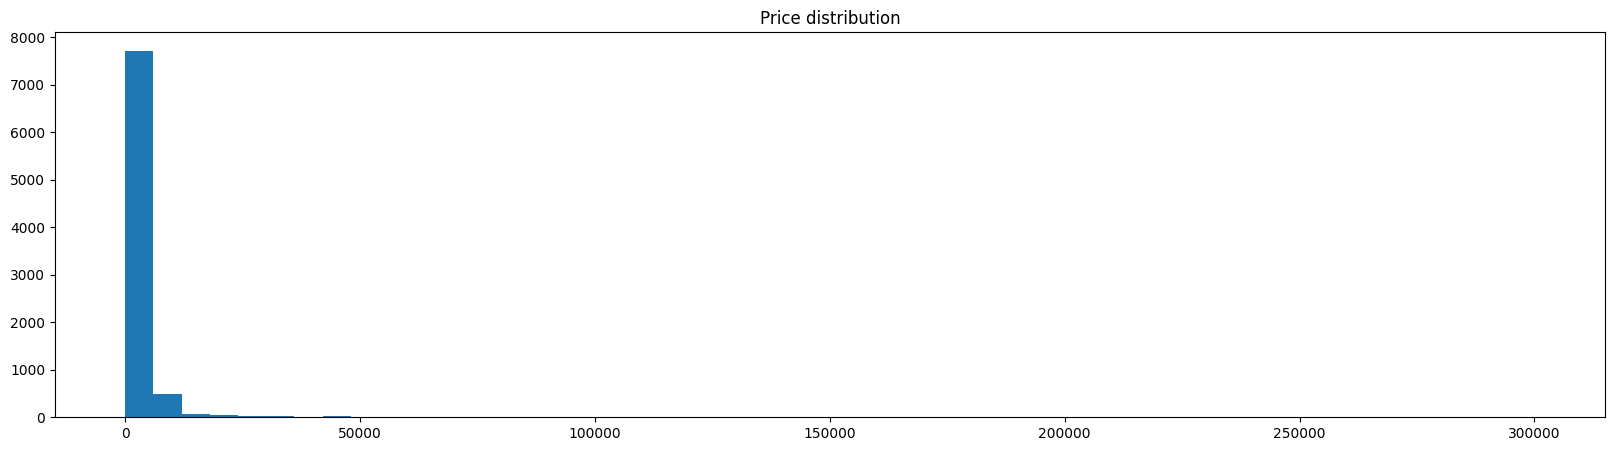

In [18]:
# Plotting a histogram for price
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

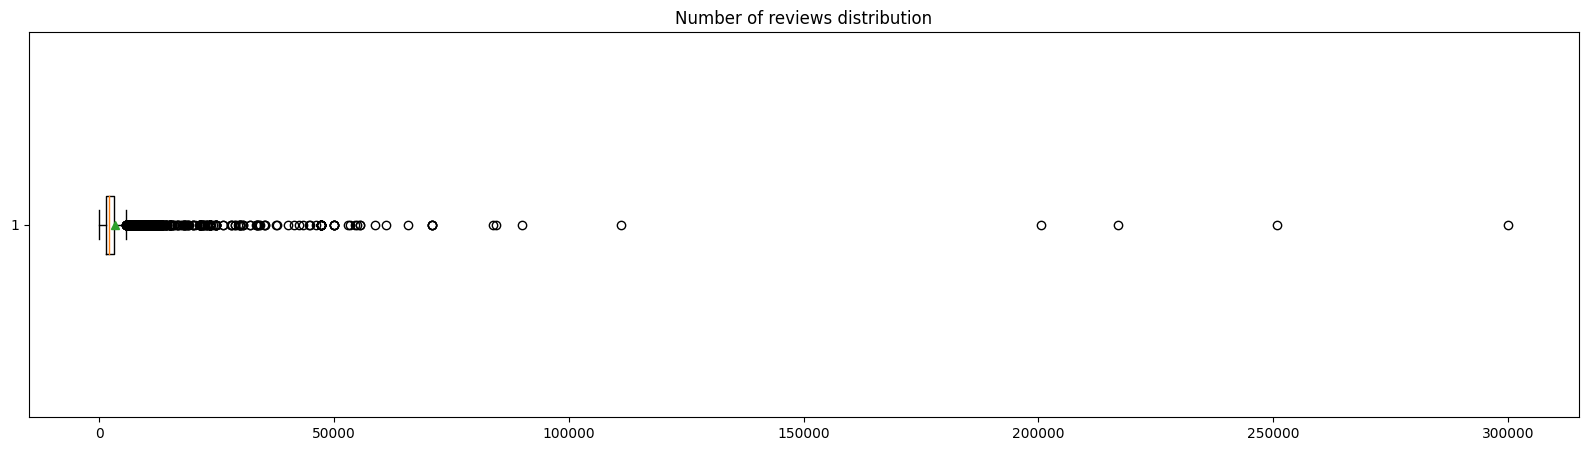

In [19]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["price_float"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

In [20]:
# Let's make some calculations for determining an outlier threshold
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

[]

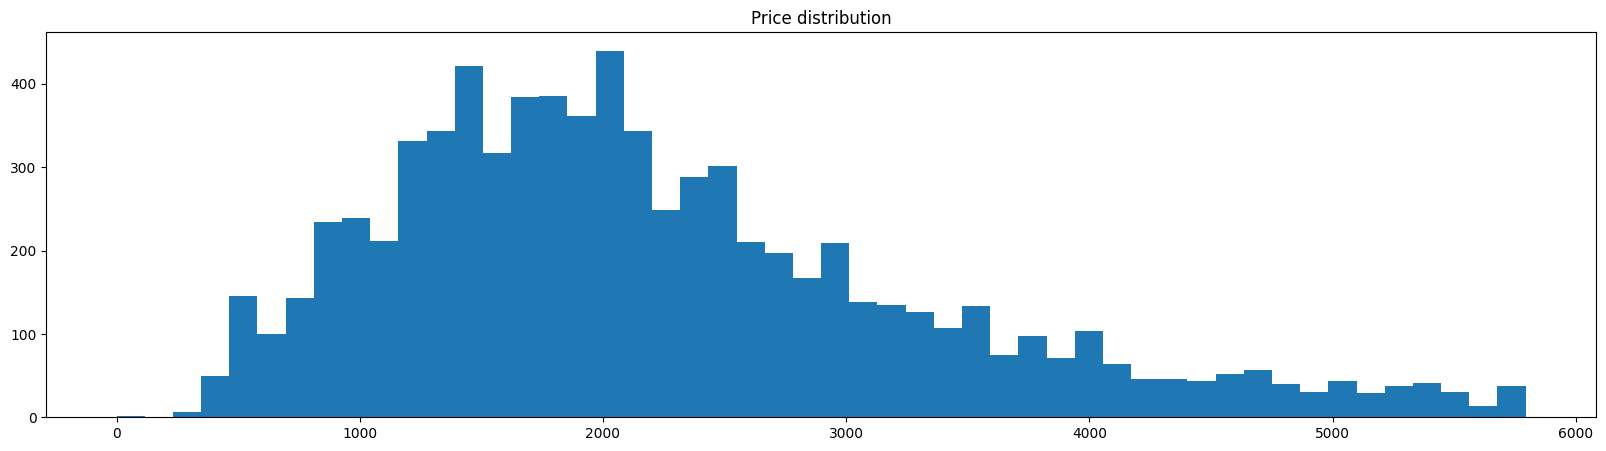

In [21]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [22]:
listings_df["price"].isnull().sum( )

0

Análisis de neighbourhood_cleansed

In [23]:
listings_df["neighbourhood_cleansed"].describe()

count        8427
unique         51
top       Praha 1
freq         3120
Name: neighbourhood_cleansed, dtype: object

In [24]:
listings_df["neighbourhood_cleansed"].isnull().sum( )

0

In [25]:
neighbourhood_frec = listings_df["neighbourhood_cleansed"].value_counts()

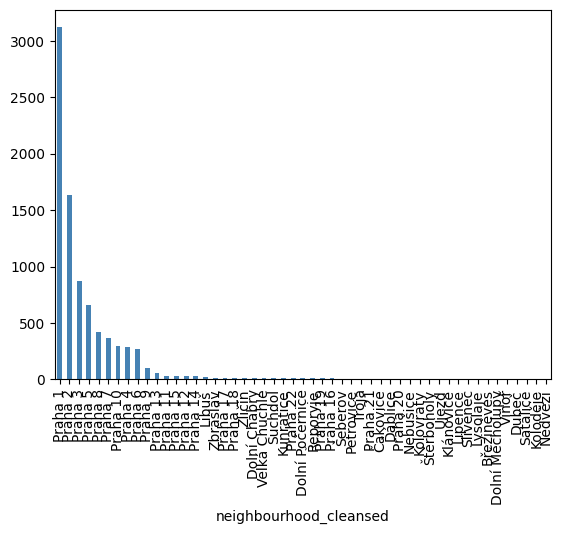

In [26]:
neighbourhood_frec.plot(kind="bar", color="steelblue")
plt.show()

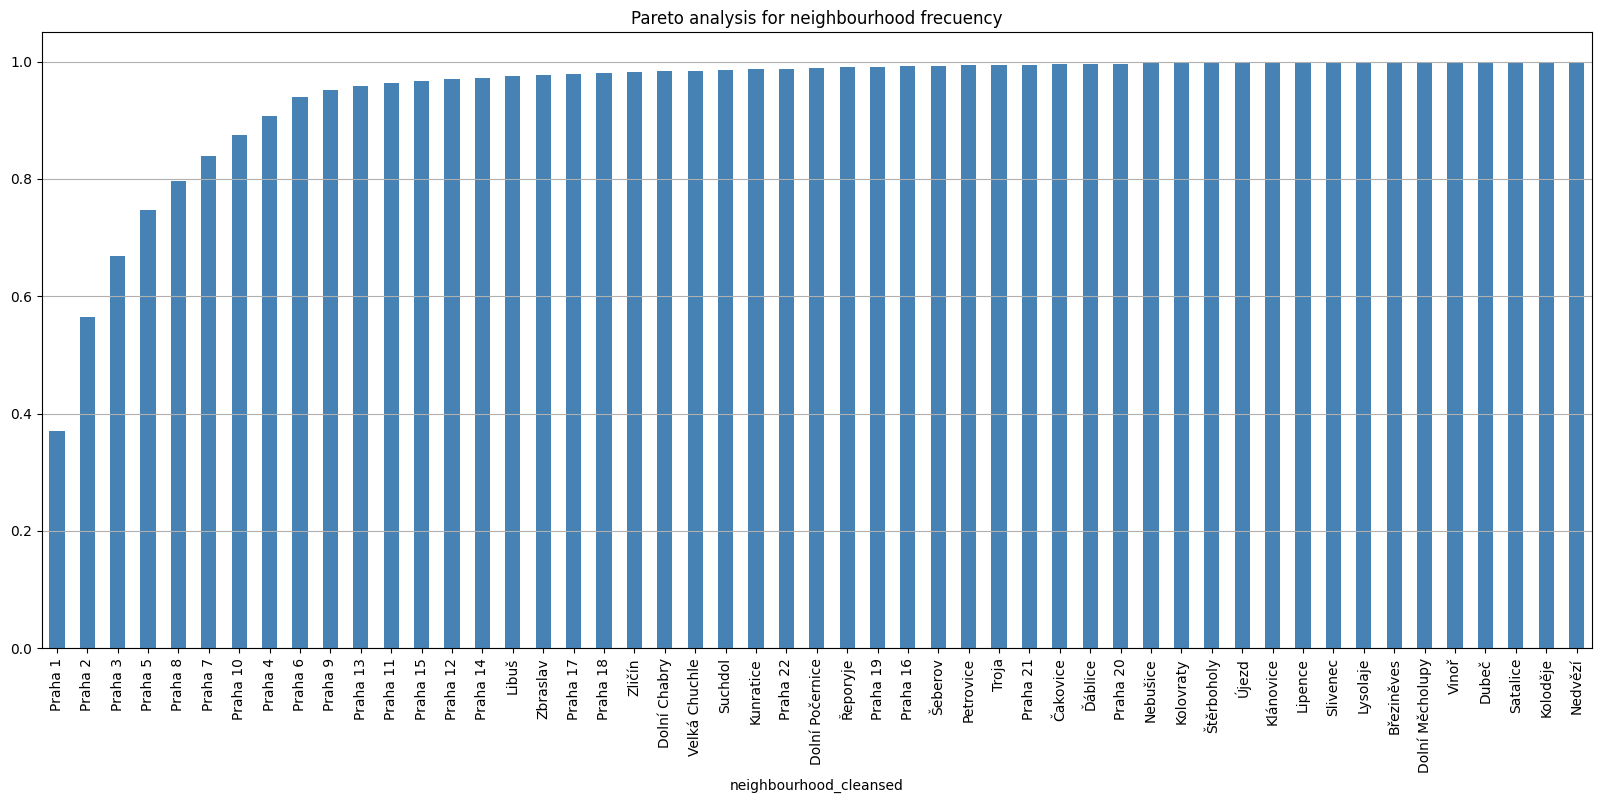

In [27]:
# Anothe common strategy for working with datasets with high variability is filter the dataset by representative groups according to the context
# In this sense, let's work only with the neighbourhoods with more listings (pareto analysis)
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()
# Plotting pareto analysis for neighbourhood frecuency
plt.figure(figsize=(20, 8))
neighbourhood_frec_cumsum.plot(kind="bar", color="steelblue")
plt.title("Pareto analysis for neighbourhood frecuency")
plt.grid(axis="y")
plt.show()

Análisis review_scores_rating

In [28]:
listings_df["review_scores_rating"].describe()

count    7470.000000
mean        4.690207
std         0.439738
min         0.000000
25%         4.610000
50%         4.800000
75%         4.930000
max         5.000000
Name: review_scores_rating, dtype: float64

In [29]:
listings_df["review_scores_rating"].isnull().sum( )/listings_df["review_scores_rating"].__len__()

0.11356354574581702

[]

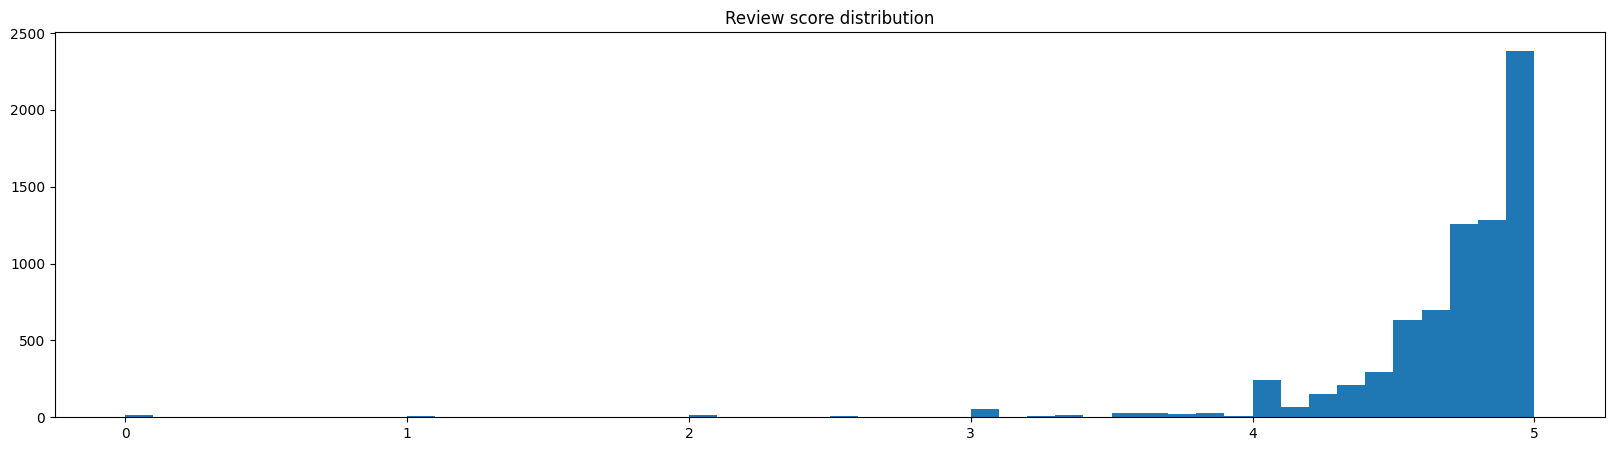

In [30]:
# Plotting a histogram for review score
plt.figure(figsize=(20, 5))
plt.hist(listings_df["review_scores_rating"], bins=50)
plt.title("Review score distribution")
plt.plot()

In [31]:
wo_review_score=listings_df[listings_df["review_scores_rating"].isnull()==True]


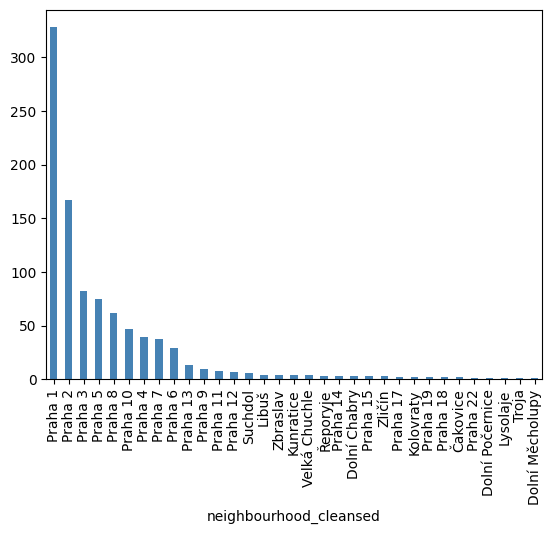

In [32]:

neighbourhood_frec_nr = wo_review_score["neighbourhood_cleansed"].value_counts()
neighbourhood_frec_nr.plot(kind="bar", color="steelblue")
plt.show()

Análisis room_type

In [33]:
listings_df["room_type"].describe()

count                8427
unique                  4
top       Entire home/apt
freq                 6745
Name: room_type, dtype: object

In [34]:
listings_df["room_type"].isnull().sum( )

0

In [35]:
# Calculating the relative frecuency of room types
listings_df["room_type"].value_counts(dropna=False, normalize=True) # You can set normalize to False for calculating the absolute frecuency

room_type
Entire home/apt    0.800403
Private room       0.164946
Hotel room         0.019699
Shared room        0.014952
Name: proportion, dtype: float64

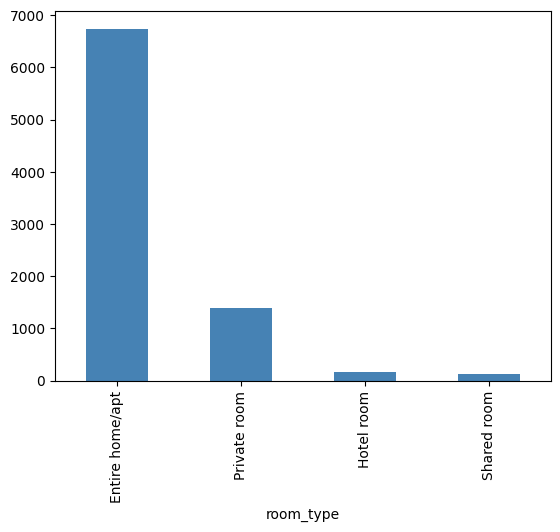

In [36]:
room_type_frec = listings_df["room_type"].value_counts()
room_type_frec.plot(kind="bar", color="steelblue")
plt.show()

Review_scores_location Analysis 

In [37]:
listings_df["review_scores_location"].describe()

count    7452.000000
mean        4.780569
std         0.312750
min         1.000000
25%         4.710000
50%         4.860000
75%         4.970000
max         5.000000
Name: review_scores_location, dtype: float64

In [38]:
listings_df["review_scores_location"].isnull().sum( )/listings_df["review_scores_location"].__len__()

0.1156995372018512

[]

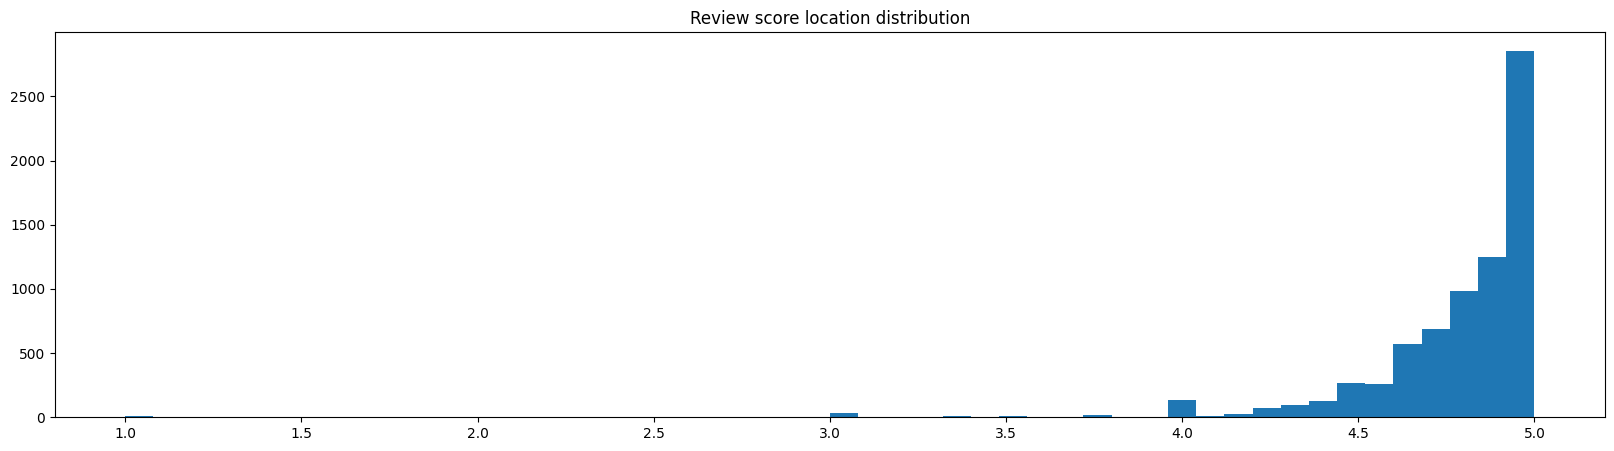

In [39]:
# Plotting a histogram for review score
plt.figure(figsize=(20, 5))
plt.hist(listings_df["review_scores_location"], bins=50)
plt.title("Review score location distribution")
plt.plot()

                                              Análisis multivariado

Estrategia de análisis (Punto 3)

Se plantea la estrategia de análisis, iniciando con tomar una muestra de los datos obtenidos. Esta muestra corresponde a los vecindarios más representativos de acuerdo a la gráfica de Pareto analizada en la sección anterior y con los precios que estan por debajo del extremo superior calculado como el valor del cuartil 3 más 1.5 veces la diferencia entre el cuartil 1 y el 3, con el fin de evitar los valores extremos del precio (identificados en la sección anterior). 

Con esta muestra se procederá a través de análisis gráfico a identificar la posible relación entre las variables seleccionadas, con las variables que del análisis anterior se visualicen de mayor influencia se analizaran respecto al número de reservaciones/gests que han tenido. Considerando que esta variable es en últimas la que da mayor información sobre las mejores condiciones para adquirir propiedades inmobiliaras con fines de acceder al modelo de negocio de Airbnb 

                           Implementación de la estrategia (Punto 4)

In [40]:
neighbourhood_frec_cumsum = listings_df["neighbourhood_cleansed"].value_counts(normalize=True).cumsum()
most_representative_neighbourhoods = neighbourhood_frec_cumsum.loc[neighbourhood_frec_cumsum < 0.8].index.tolist()
most_representative_neighbourhoods

['Praha 1', 'Praha 2', 'Praha 3', 'Praha 5', 'Praha 8']

In [41]:
dat2=listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"].isin(most_representative_neighbourhoods)]
sample=dat2.loc[:,["neighbourhood_cleansed","price_float","review_scores_value","review_scores_location","room_type"]]
sample


,neighbourhood_cleansed,price_float,review_scores_value,review_scores_location,room_type
1,Praha 2,3600.0,4.73,4.80,Entire home/apt
3,Praha 1,2649.0,4.67,4.96,Entire home/apt
4,Praha 1,2886.0,4.57,5.00,Entire home/apt
5,Praha 1,3501.0,4.50,4.98,Entire home/apt
6,Praha 1,3501.0,4.39,4.88,Entire home/apt
...,...,...,...,...,...
8421,Praha 1,2815.0,NaN,NaN,Entire home/apt
8422,Praha 1,849.0,NaN,NaN,Private room
8423,Praha 1,849.0,NaN,NaN,Private room
8424,Praha 1,849.0,NaN,NaN,Private room


c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

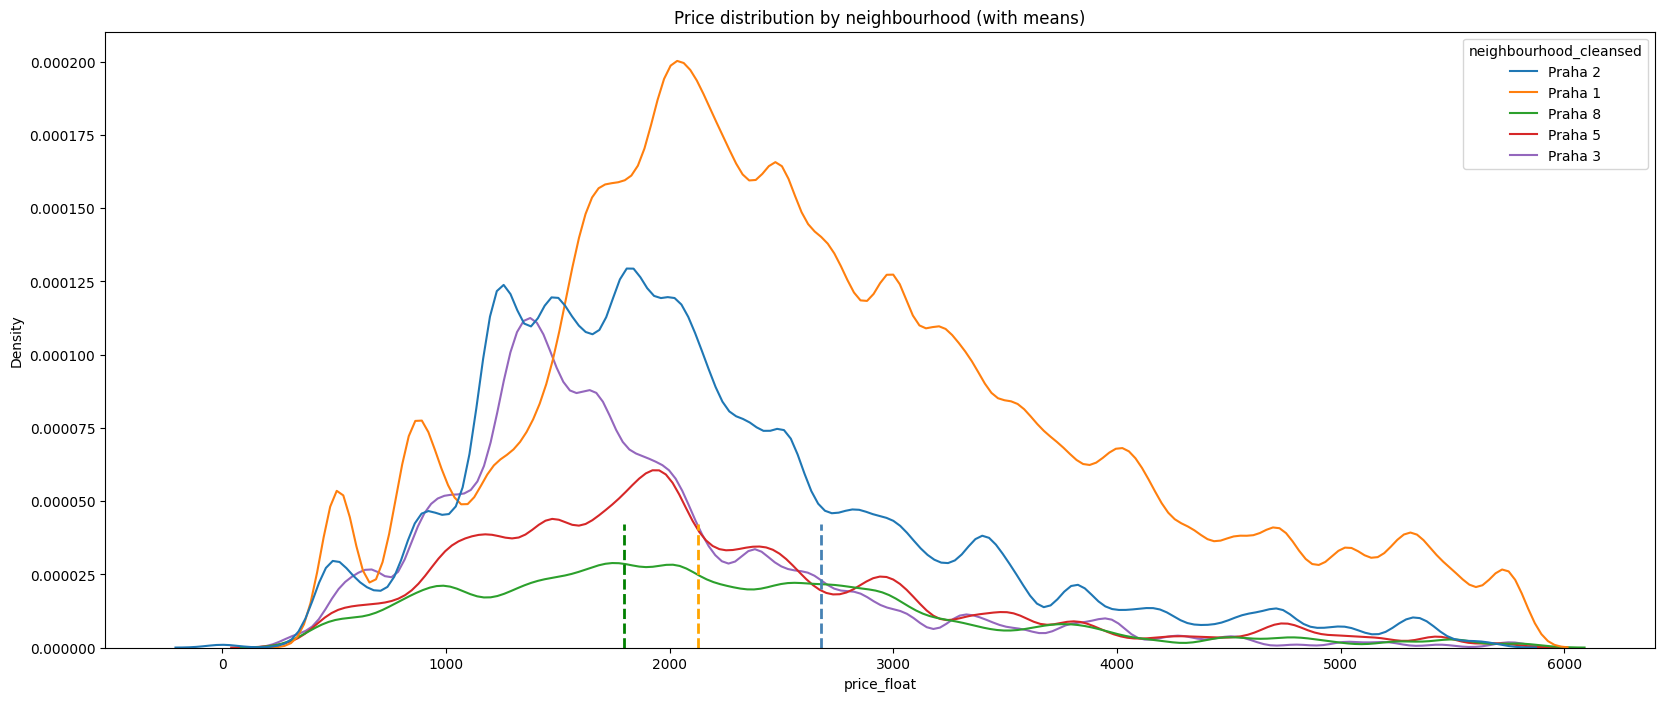

In [42]:
# Plotting price distribution by neighbourhood
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
sns.kdeplot(
    data=sample,
    x="price_float",
    hue="neighbourhood_cleansed",
    bw_adjust=.3,
    ax=ax
)
for (neighbourhood, color) in zip(most_representative_neighbourhoods, ["steelblue", "orange", "green"]):
    ax.axvline(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)].loc[listings_df["neighbourhood_cleansed"] == neighbourhood, "price_float"].mean(), color=color, linestyle="dashed", linewidth=2, ymax=0.2)
plt.title("Price distribution by neighbourhood (with means)")
plt.show()

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


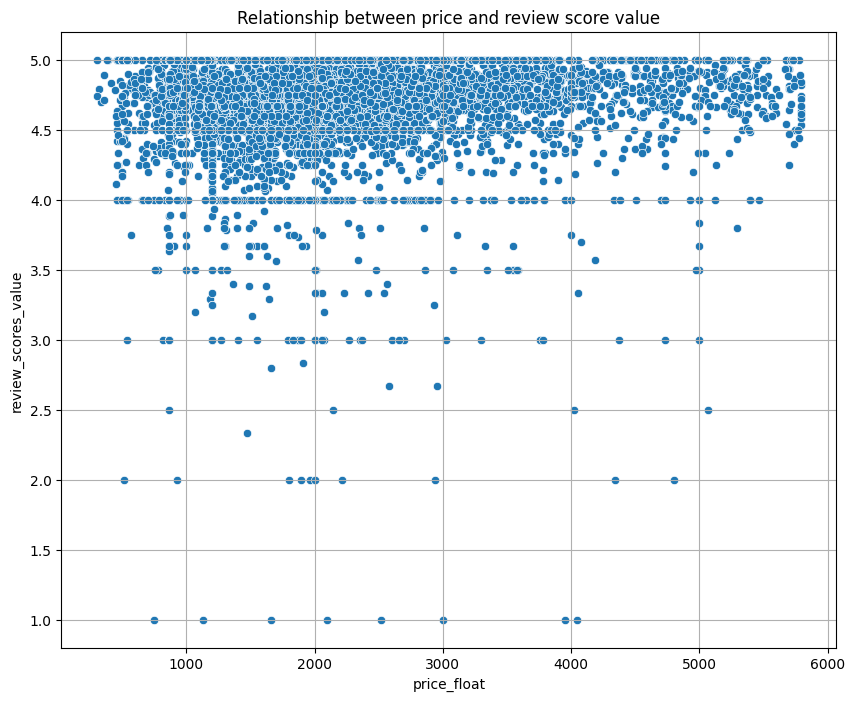

In [44]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=sample["price_float"],
    y=sample["review_scores_value"]
)
plt.title("Relationship between price and review score value")
plt.grid()
plt.show()

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


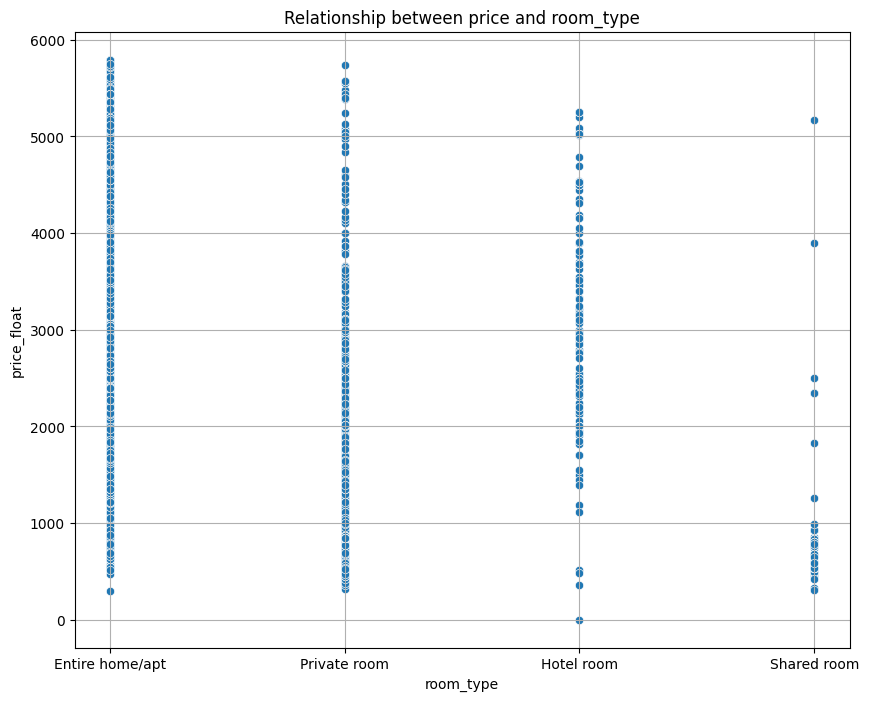

In [45]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=sample["room_type"],
    y=sample["price_float"]
)
plt.title("Relationship between price and room_type")
plt.grid()
plt.show()

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


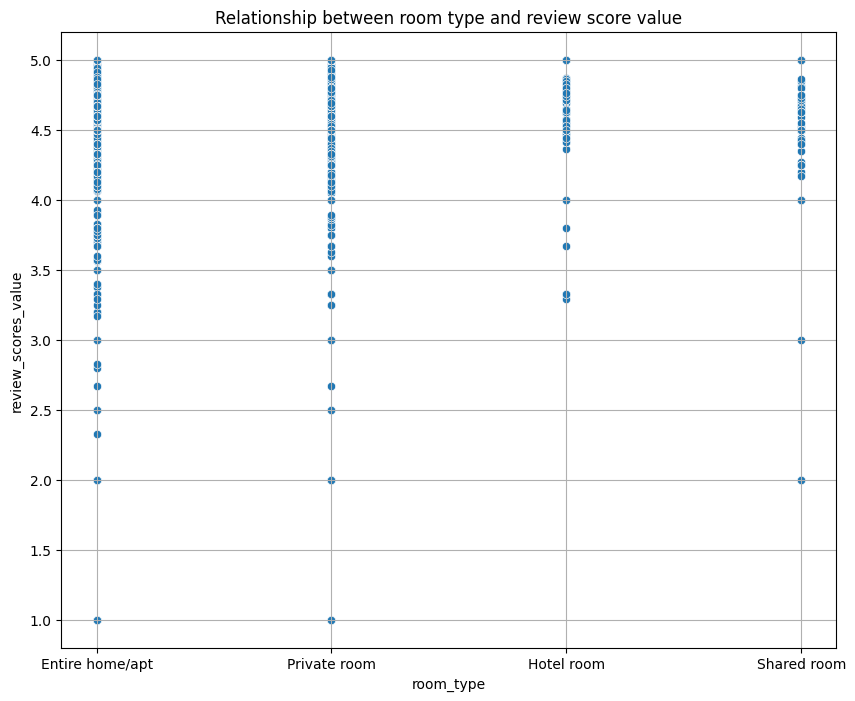

In [46]:
# Plotting the relationship between price and review score value
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=sample["room_type"],
    y=sample["review_scores_value"]
)
plt.title("Relationship between room type and review score value")
plt.grid()
plt.show()

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

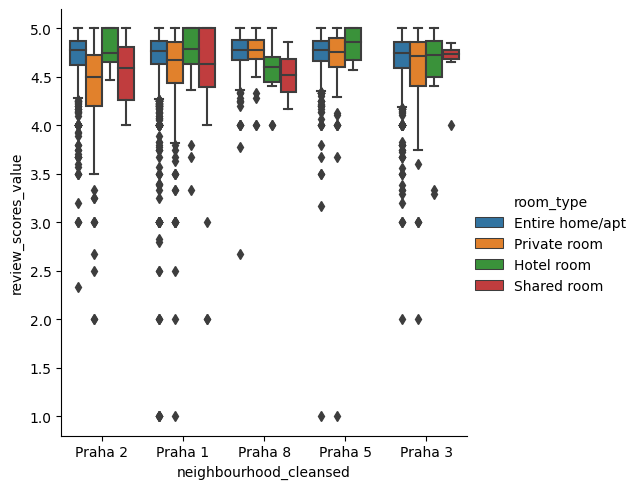

In [47]:
##Relation beteewen neighbourhood and reviews score
sns.catplot(data=sample,x="neighbourhood_cleansed",y="review_scores_value",hue="room_type",kind="box")

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

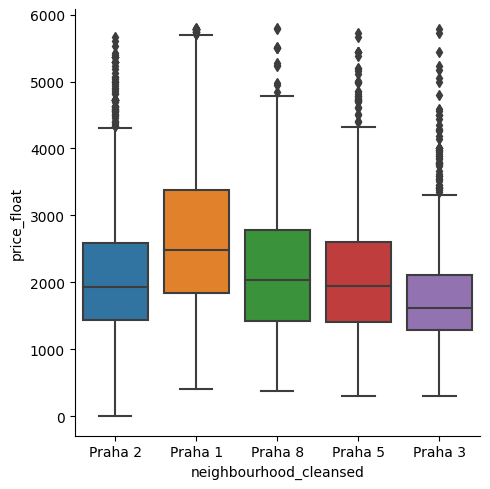

In [48]:
sns.catplot(data=sample,x="neighbourhood_cleansed",y="price_float",kind="box")

In [49]:
sample2=sample.loc[:,["room_type","neighbourhood_cleansed"]]
number_gest=sample2.groupby(by=["room_type","neighbourhood_cleansed"]).value_counts()
lista = [list(key) + [str(value)] for key,  value in  number_gest.to_dict().items()]


In [53]:
number_gest2=pd.DataFrame(lista,columns=['room_type', 'neighbourhood_cleansed', 'number_of_gest'])
number_gest2["number_of_gest"]=number_gest2["number_of_gest"].astype("Int64")
#number_gest2["neighbourhood_cleansed"]=number_gest2["neighbourhood_cleansed"].astype("category")
#number_gest2["room_type"]=number_gest2["room_type"].astype("category")
number_gest2.dtypes


room_type                 object
neighbourhood_cleansed    object
number_of_gest             Int64
dtype: object

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

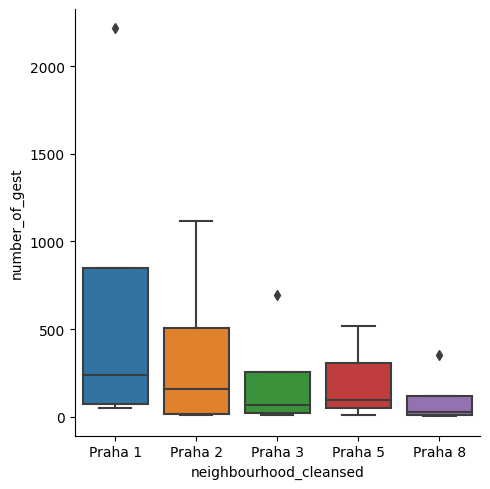

In [54]:
sns.catplot(data=number_gest2,x="neighbourhood_cleansed",y="number_of_gest",kind="box")

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

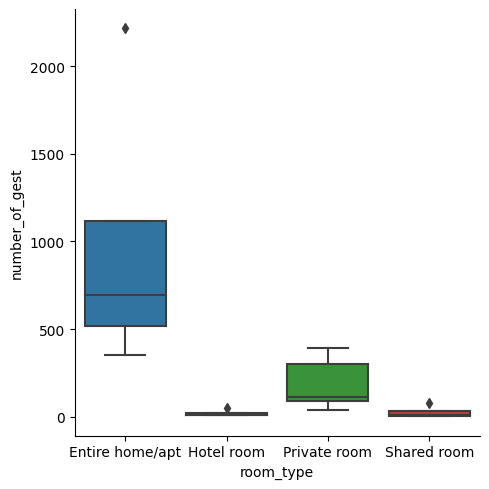

In [55]:
sns.catplot(data=number_gest2,x="room_type",y="number_of_gest",kind="box")

c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

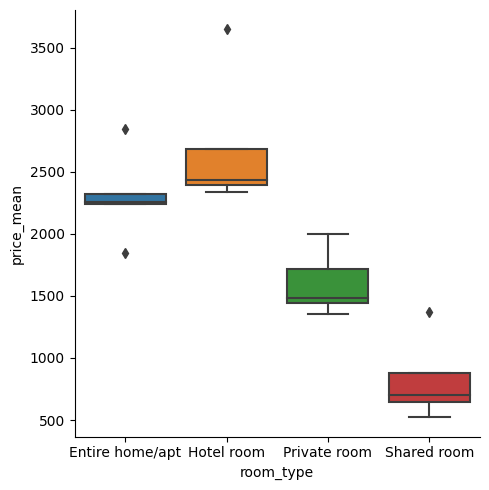

In [56]:
sample3=sample.loc[:,["room_type","neighbourhood_cleansed","price_float"]]
price_mean=sample3.groupby(by=["room_type","neighbourhood_cleansed"]).mean()
lista2 = [list(key) + [str(value)] for key,  value in  price_mean["price_float"].to_dict().items()]
price_mean=pd.DataFrame(lista2,columns=['room_type', 'neighbourhood_cleansed', 'price_mean'])
price_mean["price_mean"]=price_mean["price_mean"].astype("float")
sns.catplot(data=price_mean,x="room_type",y="price_mean",kind="box")
#lista2
#price_mean.dtypes
#price_mean

In [57]:
price_mean

,room_type,neighbourhood_cleansed,price_mean
0,Entire home/apt,Praha 1,2843.651919
1,Entire home/apt,Praha 2,2319.210385
2,Entire home/apt,Praha 3,1849.001441
3,Entire home/apt,Praha 5,2243.800000
4,Entire home/apt,Praha 8,2260.122507
5,Hotel room,Praha 1,3646.705882
6,Hotel room,Praha 2,2684.777778
7,Hotel room,Praha 3,2395.375000
8,Hotel room,Praha 5,2429.800000
9,Hotel room,Praha 8,2334.250000


c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

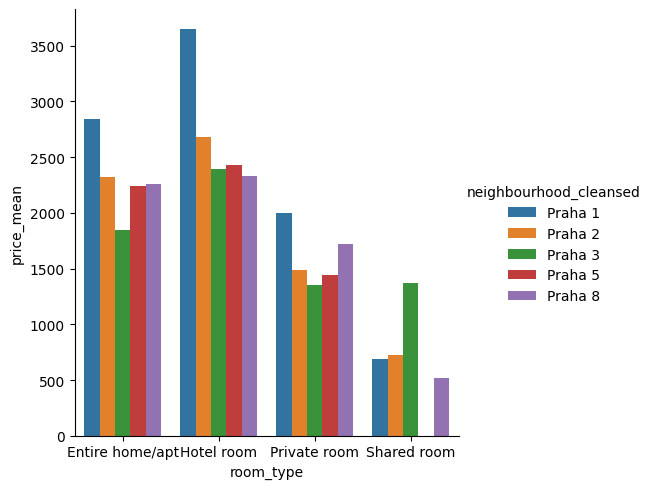

In [58]:
sns.catplot(data=price_mean,x="room_type",y="price_mean",hue="neighbourhood_cleansed",kind="bar")